In [ ]:
%pip install fast-explain

In [1]:
from FastExplain import *
df = load_titanic_data()

/Users/fzhu/Documents/GitHub/model_helper/test_env/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
/Users/fzhu/Documents/GitHub/model_helper/test_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Fit Data

In [5]:
help(model_data)

Help on function model_data in module FastExplain.main:

model_data(df: pandas.core.frame.DataFrame, dep_var: str, cat_names: Optional[List[str]] = None, cont_names: Optional[List[str]] = None, max_card: int = 20, model: Union[str, type, Callable] = 'rf', perc_train: int = 0.8, seed: int = 0, splits: Optional[List[List]] = None, cat_strategy: str = 'ordinal', fill_strategy: str = 'median', fill_const: int = 0, na_dummy: bool = True, cont_transformations: List[type] = [], reduce_memory: bool = True, hypertune: bool = False, hypertune_max_evals=100, hypertune_params: Optional[dict] = None, hypertune_loss_metric: Optional[Callable] = None, *model_args, **model_kwargs)
    Performs the full modelling pipeling returning a class that is a connected interface for all data, models and related explanatory methods. Out of the box, it will:
    
    1. Checks for Classification
    2. Identifies continuous and categorical columns
    3. Encode categorical columns with ordinal or one_hot encoding


In [6]:
model = model_data(df, dep_var="Survived", model="rf", hypertune=True)

# View Data

View how training data is split and how variables are transformed

In [7]:
model.data.train_xs.head()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,PassengerId,Age,Fare,Age_na
502,2,607,0,0,0,276,146,2,503,28.0,7.629200,1
464,2,502,1,0,0,539,146,3,465,28.0,8.050000,1
198,2,497,0,0,0,461,146,2,199,28.0,7.750000,1
765,0,369,0,1,0,71,92,3,766,51.0,77.958298,0
421,2,155,1,0,0,534,146,2,422,21.0,7.733300,0


Ordinal encoding is applied to categorical columns by default. View their mapping

In [8]:
model.data.cat_mapping

{'Survived': {0: 0, 1: 1},
 'Pclass': {0: 1, 1: 2, 2: 3},
 'Name': {0: 'Abbing, Mr. Anthony',
  1: 'Abbott, Mr. Rossmore Edward',
  2: 'Abbott, Mrs. Stanton (Rosa Hunt)',
  3: 'Abelson, Mr. Samuel',
  4: 'Abelson, Mrs. Samuel (Hannah Wizosky)',
  5: 'Adahl, Mr. Mauritz Nils Martin',
  6: 'Adams, Mr. John',
  7: 'Ahlin, Mrs. Johan (Johanna Persdotter Larsson)',
  8: 'Aks, Mrs. Sam (Leah Rosen)',
  9: 'Albimona, Mr. Nassef Cassem',
  10: 'Alexander, Mr. William',
  11: 'Alhomaki, Mr. Ilmari Rudolf',
  12: 'Ali, Mr. Ahmed',
  13: 'Ali, Mr. William',
  14: 'Allen, Miss. Elisabeth Walton',
  15: 'Allen, Mr. William Henry',
  16: 'Allison, Master. Hudson Trevor',
  17: 'Allison, Miss. Helen Loraine',
  18: 'Allison, Mrs. Hudson J C (Bessie Waldo Daniels)',
  19: 'Allum, Mr. Owen George',
  20: 'Andersen-Jensen, Miss. Carla Christine Nielsine',
  21: 'Anderson, Mr. Harry',
  22: 'Andersson, Master. Sigvard Harald Elias',
  23: 'Andersson, Miss. Ebba Iris Alfrida',
  24: 'Andersson, Miss. Elli

Plot correlation between variables

In [11]:
model.feature_correlation(plotsize = (1000,500))

# Model Info

Get model object

In [12]:
model.m

RandomForestClassifier(class_weight='balanced',
                       max_features=0.28666237436942105, max_samples=712,
                       min_samples_leaf=0.0011994266542774367,
                       min_samples_split=0.0015687492704935073,
                       n_estimators=127, n_jobs=-1)

Get model parameters

In [13]:
model.params

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 0.28666237436942105,
 'max_leaf_nodes': None,
 'max_samples': 712,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 0.0011994266542774367,
 'min_samples_split': 0.0015687492704935073,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 127,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Get fit error. Benchmark is defined as the average of training

In [14]:
model.error

{'auc': {'model': {'train': 1.0,
   'val': 0.8445981554677208,
   'overall': 0.9832736820801243}},
 'cross_entropy': {'benchmark': {'train': 0.6657168967694277,
   'val': 0.6666897029983944,
   'overall': 0.6659123314663806},
  'model': {'train': 0.10404516119385976,
   'val': 0.45490158399570163,
   'overall': 0.1745314683560704}}}

Plot feature importance and highlight certain features

In [15]:
model.plot_feature_importance(feature_highlights=["Age"])

# Explore Fit

Simple one way analysis

In [18]:
help(model.plot_one_way_analysis)

Help on method plot_one_way_analysis in module FastExplain.explain.one_way:

plot_one_way_analysis(x_col: str, y_col: Union[List[str], str, NoneType] = None, numeric: Optional[bool] = None, max_card: int = 20, grid_size: int = 20, bins: Optional[List[float]] = None, func: Optional[Callable] = None, size_cutoff: int = 0, dp: int = 2, percentage: bool = False, condense_last: bool = True, filter: Optional[str] = None, index_mapping: Optional[dict] = None, x_axis_name: Optional[str] = None, y_axis_name: Union[List[str], str, NoneType] = None, plot_title: Optional[str] = None, plotsize: Optional[List[int]] = None, sort: bool = False, ascending: bool = True) method of FastExplain.models.classification.Classification instance
    Plot one-way analysis between two features in a DataFrame. The x_col is binned and a function is applied to the y_col grouped by values of the x_col
    
    Args:
        df (pd.DataFrame):
            Dataframe containing features to compare
        x_col (str):
  

In [16]:
model.plot_one_way_analysis("Age")

In [17]:
model.plot_one_way_analysis("Sex")

ALE Plots

In [21]:
help(model.plot_ale)

Help on method plot_ale in module FastExplain.explain.ale:

plot_ale(col: str, grid_size: int = 20, bins: Optional[List[float]] = None, numeric: Optional[bool] = None, max_card: int = 20, normalize_quantiles: bool = True, standardize_values: bool = True, percentage: bool = False, condense_last: bool = True, remove_last_bins: Optional[int] = None, dp: int = 2, filter: Optional[str] = None, index_mapping: Optional[dict] = None, dep_name: Optional[str] = None, feature_name: Optional[str] = None, model_names: Optional[List[str]] = None, plot_title: Optional[str] = None, plotsize: Optional[List[int]] = None) method of FastExplain.models.classification.Classification instance
    Plot ALE values for a predictor feature in a model
    
    Args:
        col (str):
            Name of predictor feature to use for ALE
        grid_size (int, optional):
            Number of predictor quantiles to bin data into. Defaults to 20.
        bins (Optional[List[float]], optional):
            Optional

In [19]:
model.plot_ale("Age")

In [20]:
model.plot_ale("Sex")

SHAP Values

In [22]:
model.get_shap_values()

,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,PassengerId,Age,...,shap_Sex,shap_SibSp,shap_Parch,shap_Ticket,shap_Cabin,shap_Embarked,shap_PassengerId,shap_Age,shap_Fare,shap_Age_na
502,2,607,0,0,0,276,146,2,503,28.0,...,0.249357,-0.003706,-0.000276,-0.093365,-0.025412,0.022326,-0.083080,-0.024658,-0.094568,-0.014853
464,2,502,1,0,0,539,146,3,465,28.0,...,-0.129389,-0.001482,-0.006068,-0.052725,-0.029494,-0.018951,-0.045528,-0.037108,-0.088256,-0.009234
198,2,497,0,0,0,461,146,2,199,28.0,...,0.352904,0.010302,0.008689,-0.000865,-0.012580,0.063633,0.046373,-0.008844,-0.015440,0.003920
765,0,369,0,1,0,71,92,3,766,51.0,...,0.197512,0.012796,-0.000981,0.079528,0.064040,-0.003504,-0.002834,-0.034515,0.083259,0.000219
421,2,155,1,0,0,534,146,2,422,21.0,...,-0.181818,-0.001593,-0.008559,-0.040775,-0.028476,-0.012679,-0.034814,-0.031705,-0.066270,-0.000114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0,292,1,0,0,607,12,0,97,71.0,...,-0.159052,-0.009736,-0.009425,-0.017438,0.109793,0.015171,-0.052798,-0.092892,0.003030,0.000412
440,1,344,0,1,1,571,146,3,441,45.0,...,0.265218,0.005461,0.021341,-0.017072,-0.021982,-0.003538,-0.006134,-0.067445,0.016604,0.000973
75,2,546,1,0,0,347,140,3,76,25.0,...,-0.180560,0.001603,-0.012108,-0.058882,0.008675,-0.009479,0.017937,-0.015577,-0.056560,-0.001662
575,2,639,1,0,0,420,146,3,576,19.0,...,-0.186828,0.000294,-0.010048,-0.069652,-0.036322,-0.015314,-0.023356,-0.010660,-0.009109,-0.000746


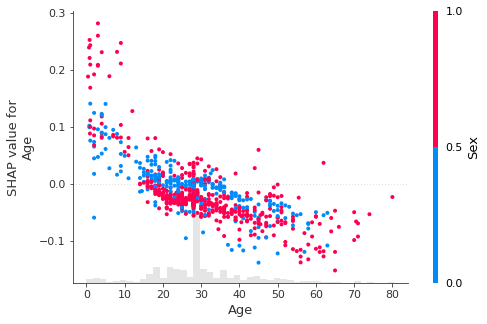

In [23]:
model.shap_dependence_plot("Age")

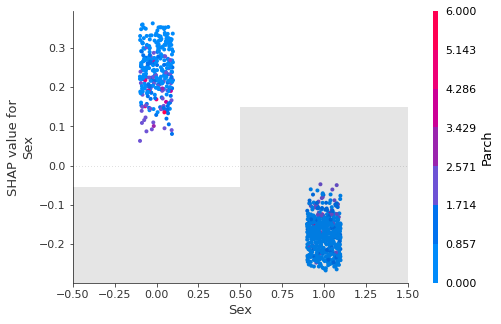

In [24]:
model.shap_dependence_plot("Sex")